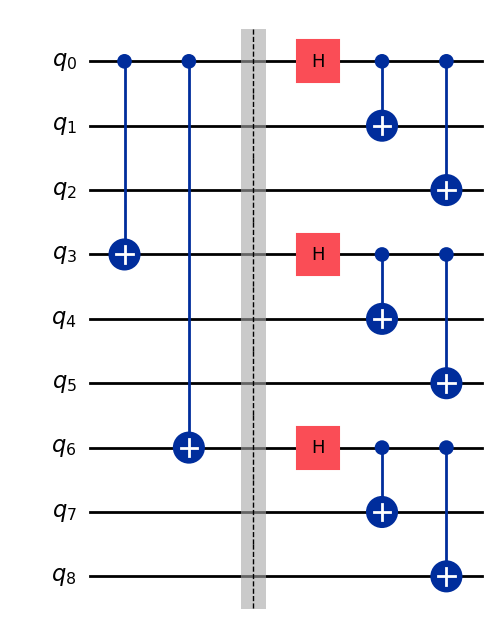

In [1]:
from shor_code_package.shor_code import ShorQubit, ShorCircuit
from qiskit.quantum_info import Operator, Statevector, StabilizerState
import qiskit.quantum_info as qi
from qiskit import AncillaRegister, QuantumCircuit, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np



sc = ShorQubit()
encoder = sc.encoder()
encoder.draw('mpl')

s = Statevector.from_label("0"*9)
s2 = s.evolve(Operator(encoder))
s2.draw('latex')

encoder.draw('mpl')

In [2]:
ghz = Statevector([1/np.sqrt(2),0,0,0,0,0,0,1/np.sqrt(2)])
target = ghz.copy() ^ ghz.copy() ^ ghz.copy()
target.is_valid()
target.draw('latex')

#qc = QuantumCircuit(9)
#qc.x(0)
#qc.compose(ShorQubit().encoder(), inplace=True)
#qc.draw('mpl')
ghz.draw('latex')

<IPython.core.display.Latex object>

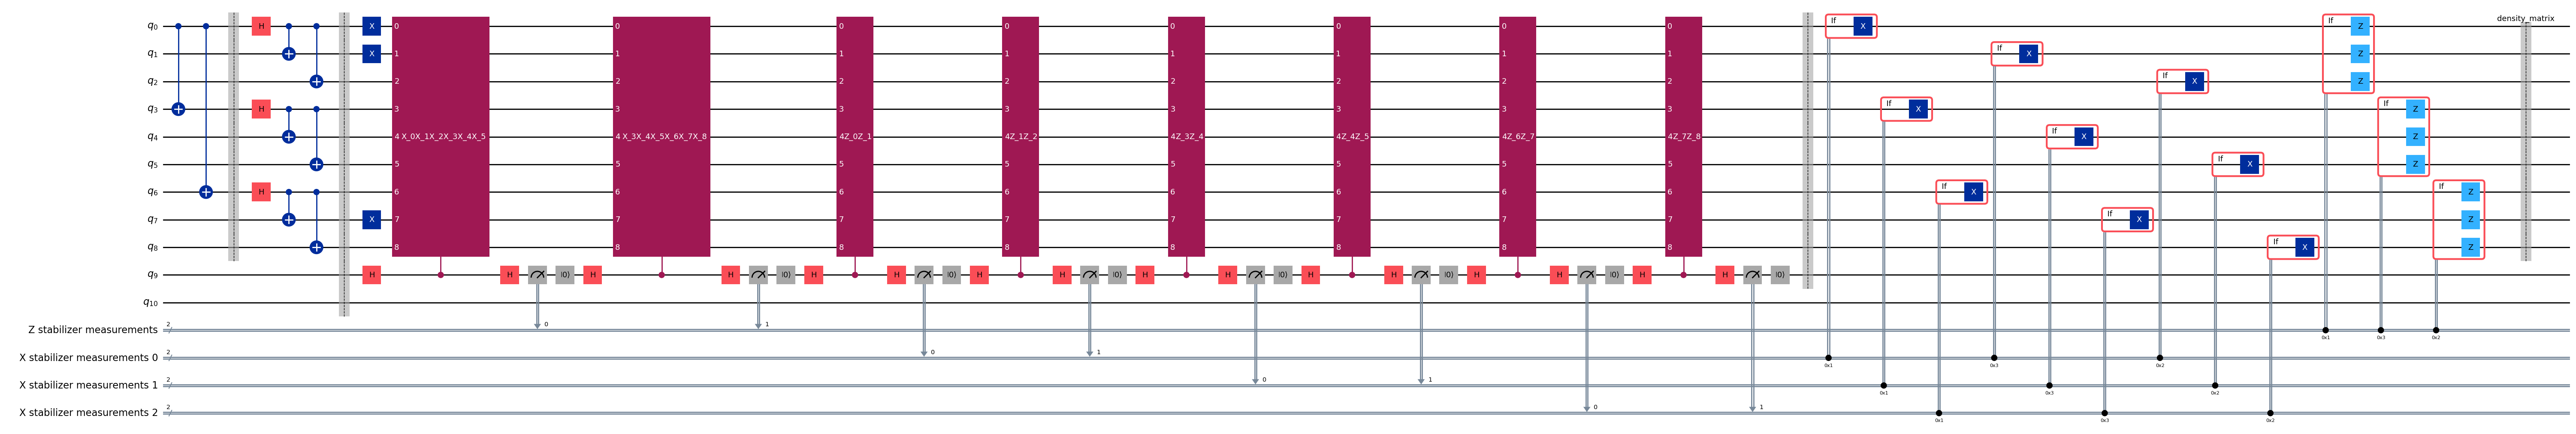

In [ ]:
aer = AerSimulator(method="statevector")

sc = ShorQubit()

qc = QuantumCircuit(11)
qc.compose(ShorQubit().encoder(), inplace = True)
qc.barrier()

qc.x(0)
qc.x(5)
qc.x(7)

#qc.x(7)

#qc.z(1)

qc.compose(ShorQubit().syndrome_correction_circuit(True), inplace = True)
qc.save_density_matrix(range(9))

display(qc.draw('mpl', fold = -1))

res = aer.run(qc.decompose(), shots = 1)

In [12]:
def logical_1():
    ghz = qi.Statevector([1/np.sqrt(2), 0, 0, 0, 0, 0, 0, -1/np.sqrt(2)])
    return ghz ^ ghz ^ ghz
def logical_0():
    ghz = qi.Statevector([1/np.sqrt(2), 0, 0, 0, 0, 0, 0, 1/np.sqrt(2)])
    return ghz ^ ghz ^ ghz

s = res.result().data()['density_matrix']

display(s.to_statevector().draw('latex'))
display(logical_0().draw('latex'))
display(logical_1().draw('latex'))

res.result().get_counts()



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

{'11 00 10 00': 1}

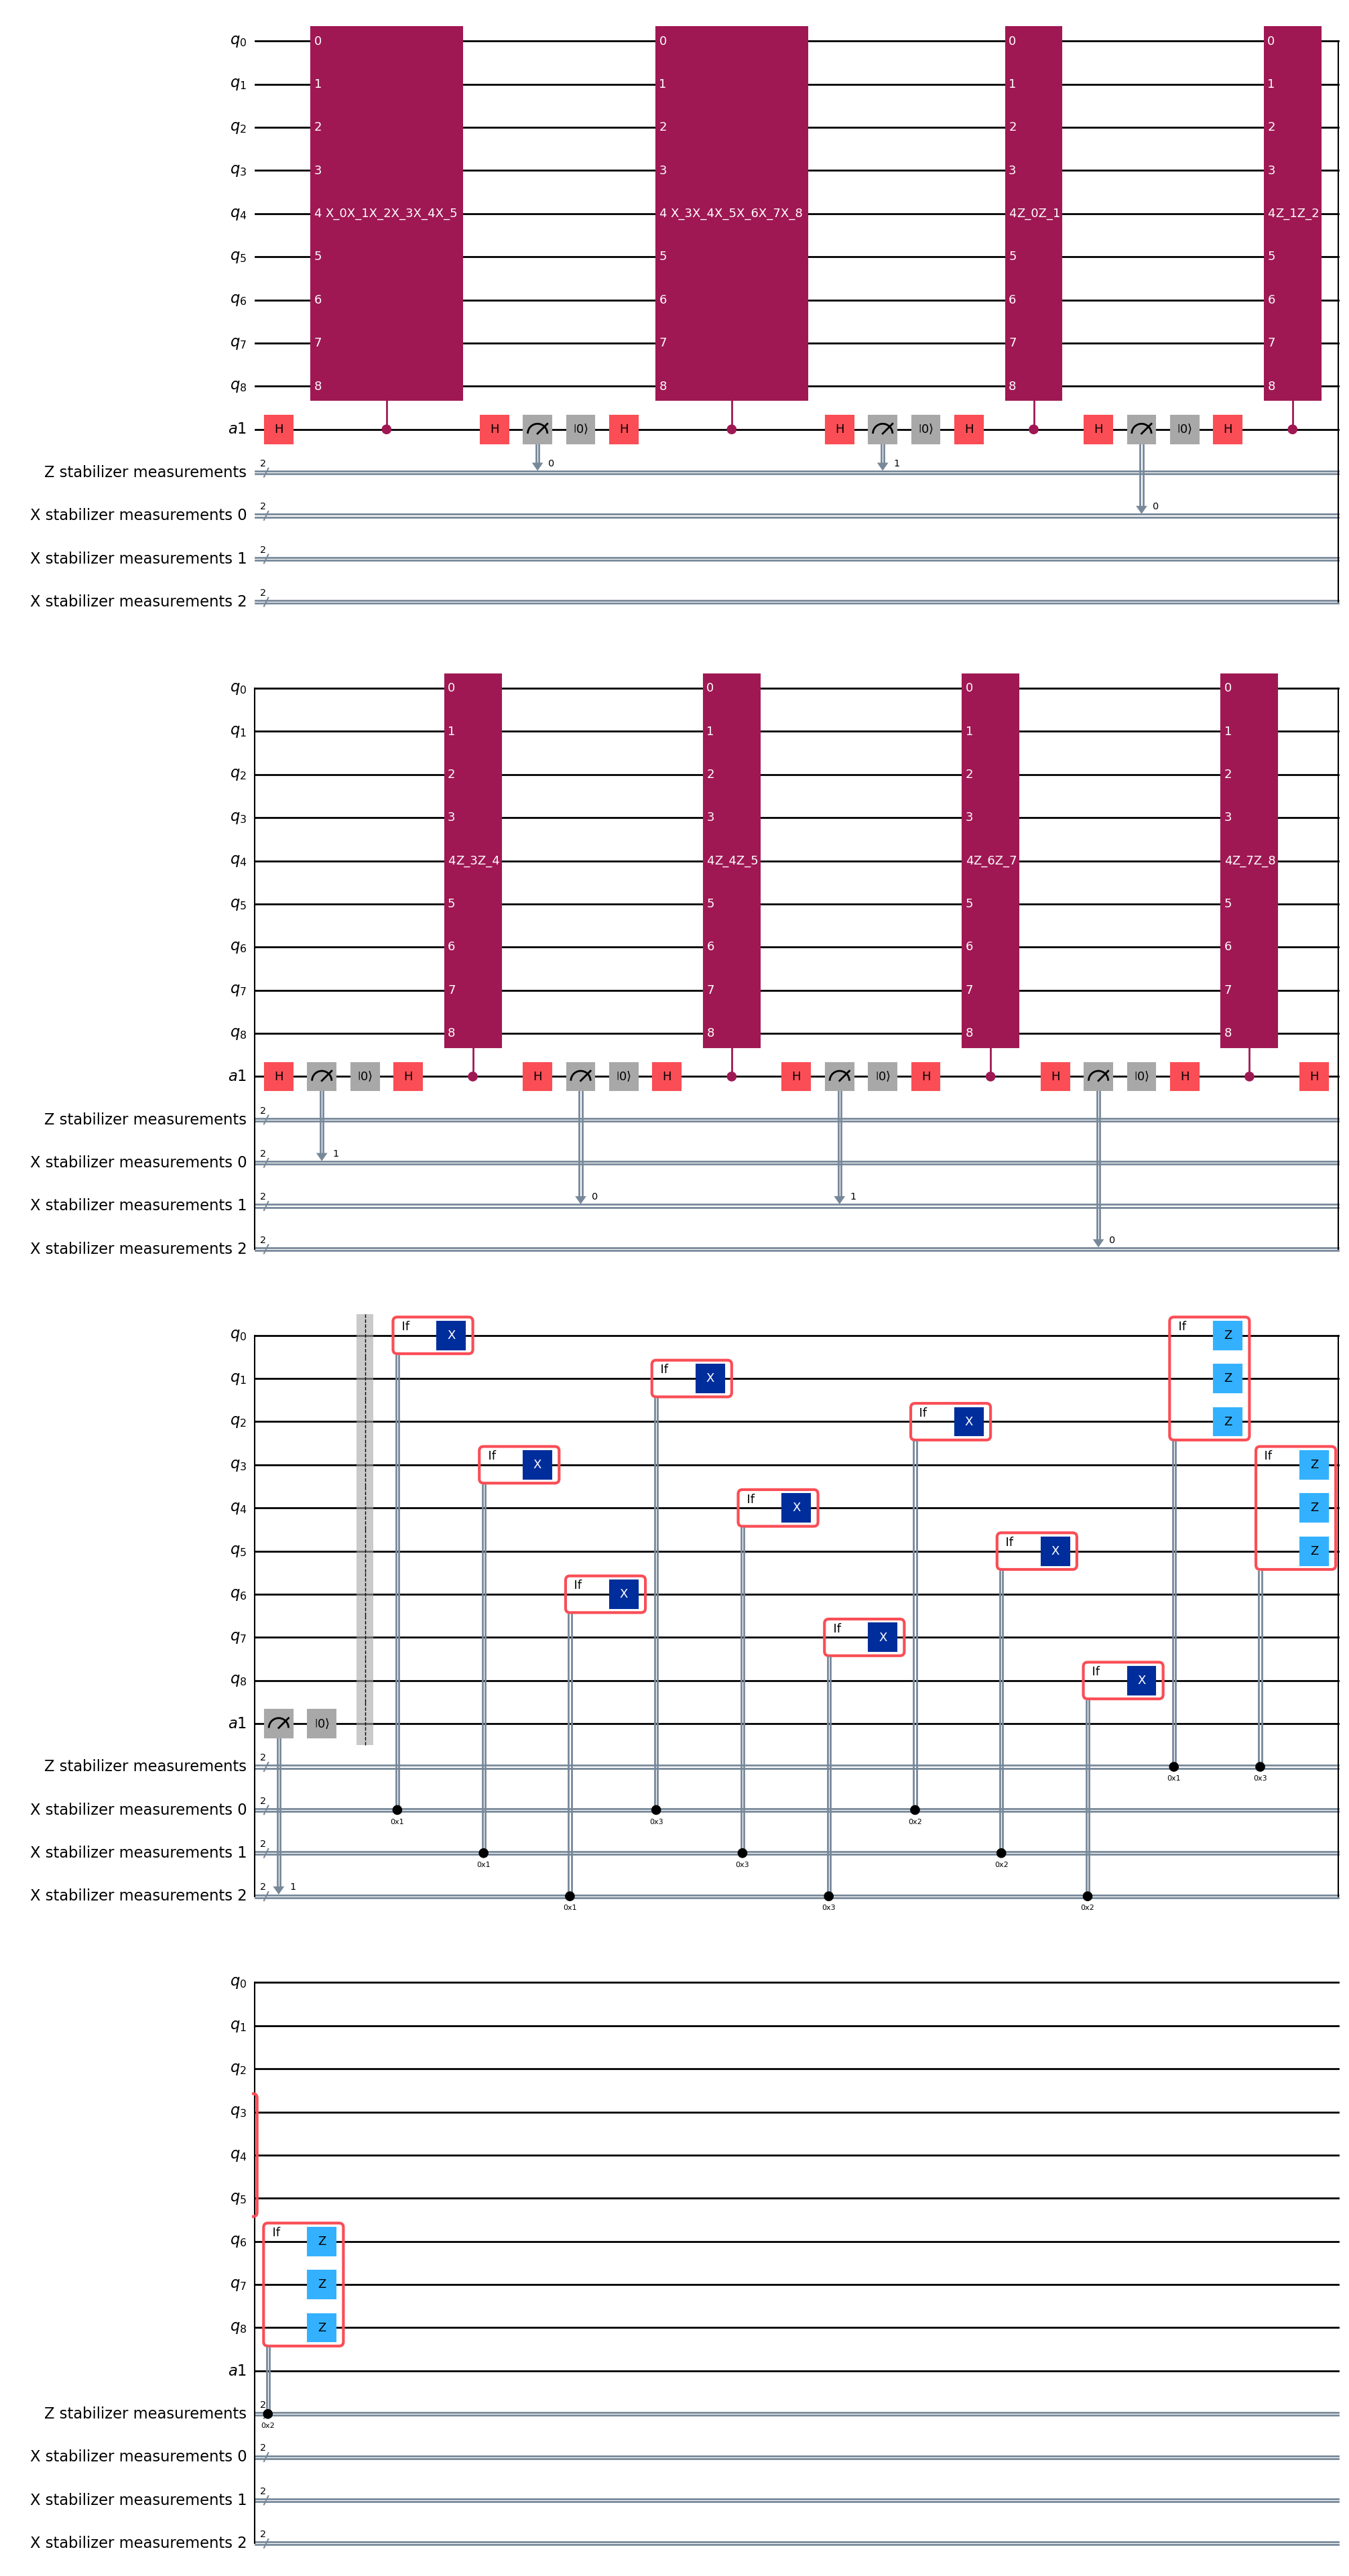

In [5]:
sq = ShorQubit()
qc = sq.syndrome_correction_circuit()

qc.draw('mpl')

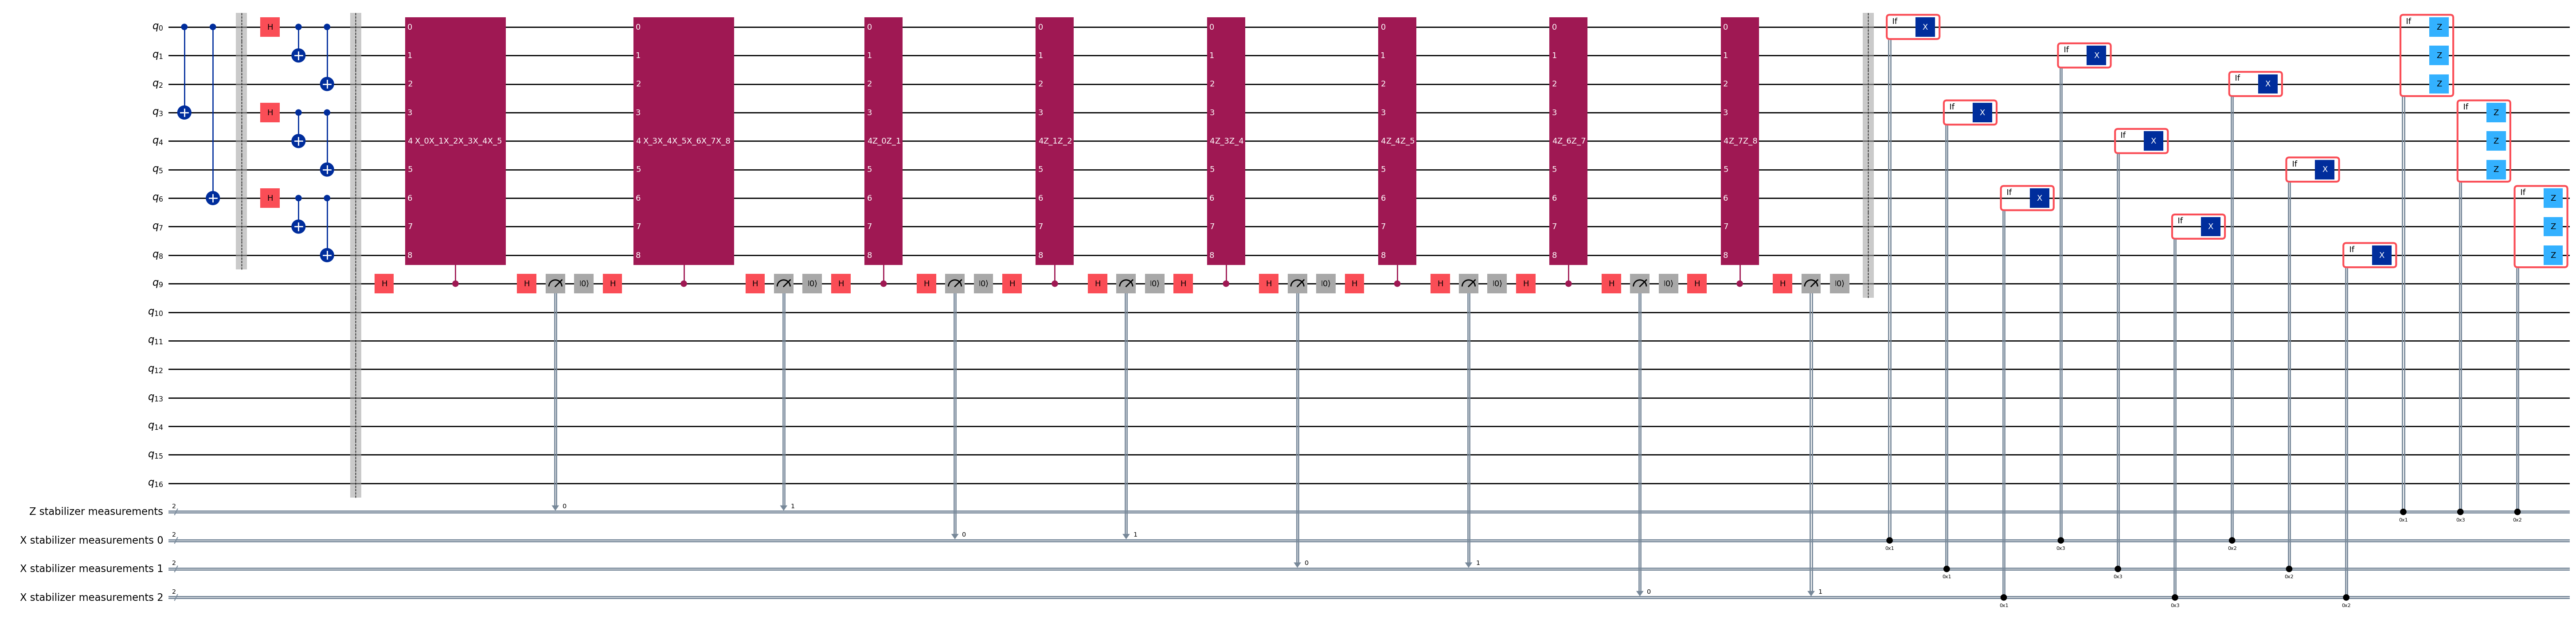

In [6]:
qc = sq.circuit()

qc.draw('mpl', fold=-1)

In [7]:
[(x,y) for x in range(5) for y in range(5)]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]